In [38]:
import pandas as pd
import sqlite3
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from scipy import *
%matplotlib inline

In [2]:
def read_sqllite(sqllite_db, tablename):
    """ To read data from sqllite table.
    ---------------
    Parameters
    
    sqllite_db - String. Name of sqllite database
    
    tablename - String. Name of table in database to extract data from
    
    --------------
    Returns
    
    df - Dataframe. Data frame of data extracted from database table.
    """
    con=sqlite3.connect(sqllite_db)
    df=pd.read_sql_query("select * from " + tablename + ";", con)
    
    return df
    
train_times = read_sqllite(sqllite, 'TIMES')
station_locations = read_sqllite(sqllite, 'LOCATIONS')

NameError: name 'sqllite' is not defined

In [ ]:
# To extract all stations within an area
d2=d[(d['Easting']>123374) & (d['Easting'] < 340361) & (d['Northing']>6974) & (d['Northing']<152168)]


{}

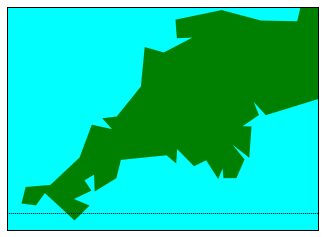

In [7]:
map2 = Basemap(projection='merc',
    resolution = 'l', area_thresh = 0.1,
    llcrnrlon=-5.8535212, llcrnrlat=49.898888,
    urcrnrlon=-2.856179, urcrnrlat=51.265534)
map2.drawmapboundary(fill_color='aqua')
map2.fillcontinents(color='green', lake_color='aqua')
parallels = np.arange(0.,81,10.)
map2.drawparallels(parallels)

meridians = np.arange(10.,351.,20.)
map2.drawmeridians(meridians

In [132]:
stations=pd.read_csv('stations.csv')
stations['Easting']=stations['Easting']-80
#stations['Northing']=stations['Northing']-80



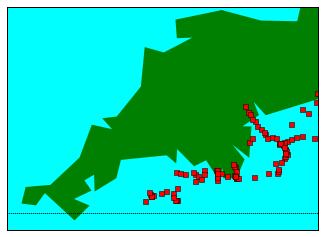

In [133]:
map2 = Basemap(projection='merc',
    resolution = 'l', area_thresh = 0.1,
    llcrnrlon=-5.8535212, llcrnrlat=49.898888,
    urcrnrlon=-2.856179, urcrnrlat=51.265534)
map2.drawmapboundary(fill_color='aqua')
map2.fillcontinents(color='green', lake_color='aqua')
parallels = np.arange(0.,81,10.)
map2.drawparallels(parallels)

meridians = np.arange(10.,351.,20.)
map2.drawmeridians(meridians)

#stations=stations[time==time]

Easting = stations['Easting']
Northing = stations['Northing']
#x,y = map(list(Easting), list(Northing))  # To convert lat/long to projection 
#map2.plot(x,y, 'rs', markersize=18)

map2.plot(Easting, Northing, 'rs', markersize=5)
#labels = ['The Needles','Brighton']
#label_style=['rs','bo']
#for label, xpt, ypt, style in zip(labels, x, y, label_style):
#    print label, xpt, ypt, style
#    map2.plot(xpt,ypt,style, markersize=12)
#    plt.text(xpt,ypt, label)
    
#plt.show

In [100]:
def OSGB36toWGS84(df):
    lats=[]
    longs=[]
    for station in range(1,len(df), 1):
        E = df['Easting'][station]
        N = df['Northing'][station]
        
        #E, N are the British national grid coordinates - eastings and northings
        a, b = 6377563.396, 6356256.909 #The Airy 180 semi-major and semi-minor axes used for OSGB36 (m)
        F0 = 0.9996012717 #scale factor on the central meridian
        lat0 = 49*pi/180#Latitude of true origin (radians)
        lon0 = -2*pi/180#Longtitude of true origin and central meridian (radians)
        N0, E0 = -100000, 400000#Northing & easting of true origin (m)
        e2 = 1 - (b*b)/(a*a)#eccentricity squared
        n = (a-b)/(a+b)

        #Initialise the iterative variables
        lat,M = lat0, 0

        while N-N0-M >= 0.00001: #Accurate to 0.01mm
            lat = (N-N0-M)/(a*F0) + lat;
            M1 = (1 + n + (5/4)*n**2 + (5/4)*n**3) * (lat-lat0)
            M2 = (3*n + 3*n**2 + (21/8)*n**3) * sin(lat-lat0) * cos(lat+lat0)
            M3 = ((15/8)*n**2 + (15/8)*n**3) * sin(2*(lat-lat0)) * cos(2*(lat+lat0))
            M4 = (35/24)*n**3 * sin(3*(lat-lat0)) * cos(3*(lat+lat0))
            #meridional arc
            M = b * F0 * (M1 - M2 + M3 - M4)

            #transverse radius of curvature
            nu = a*F0/sqrt(1-e2*sin(lat)**2)
            #meridional radius of curvature
            rho = a*F0*(1-e2)*(1-e2*sin(lat)**2)**(-1.5)
            eta2 = nu/rho-1

            secLat = 1./cos(lat)
            VII = tan(lat)/(2*rho*nu)
            VIII = tan(lat)/(24*rho*nu**3)*(5+3*tan(lat)**2+eta2-9*tan(lat)**2*eta2)
            IX = tan(lat)/(720*rho*nu**5)*(61+90*tan(lat)**2+45*tan(lat)**4)
            X = secLat/nu
            XI = secLat/(6*nu**3)*(nu/rho+2*tan(lat)**2)
            XII = secLat/(120*nu**5)*(5+28*tan(lat)**2+24*tan(lat)**4)
            XIIA = secLat/(5040*nu**7)*(61+662*tan(lat)**2+1320*tan(lat)**4+720*tan(lat)**6)
            dE = E-E0

            lat = lat - VII*dE**2 + VIII*dE**4 - IX*dE**6
            lon = lon0 + X*dE - XI*dE**3 + XII*dE**5 - XIIA*dE**7

            #Convert to degrees
            lat = lat*180/pi
            lon = lon*180/pi
            
        #print lat
        #print long
        lats.append(lat)
        longs.append(long)
        
    return lat, long


In [72]:
#stations['Latitude'] = [OSGB36toWGS84(e,n) for e, n in stations[['Easting', 'Northing']]]
#stations['Longitude'] = OSGB36toWGS84(stations[['Easting', 'Northing']])[1]

#[OSGB36toWGS84(e,n) for e, n in stations[['Easting', 'Northing']]]

OSGB36toWGS84(stations[['Easting', 'Northing']])
#stations[['Easting', 'Northing']]

2892.50198982
<type 'long'>
2890.53764664
<type 'long'>
2890.22549047
<type 'long'>
2929.28118698
<type 'long'>
2926.18372356
<type 'long'>
2925.08423586
<type 'long'>
2887.61984427
<type 'long'>
2893.20051855
<type 'long'>
2875.98337936
<type 'long'>
2887.92705621
<type 'long'>
2876.74978604
<type 'long'>
2907.64839755
<type 'long'>
2922.89678076
<type 'long'>
2890.22967801
<type 'long'>
2911.33191974
<type 'long'>
2909.54851229
<type 'long'>
2897.95661736
<type 'long'>
2898.98097541
<type 'long'>
2886.37355
<type 'long'>
2905.58110284
<type 'long'>
2886.58166099
<type 'long'>
2915.52550645
<type 'long'>
2906.29617455
<type 'long'>
2906.45588496
<type 'long'>
2905.76158505
<type 'long'>
2900.29361258
<type 'long'>
2902.96550314
<type 'long'>
2873.3323728
<type 'long'>
2873.19692819
<type 'long'>
2909.74382423
<type 'long'>
2894.24717795
<type 'long'>
2875.32626383
<type 'long'>
2934.45192006
<type 'long'>
2910.3113938
<type 'long'>
2887.2259853
<type 'long'>
2887.02304933
<type 'long'

([2892.5019898215692,
  2890.5376466373846,
  2890.2254904709107,
  2929.2811869836451,
  2926.1837235554799,
  2925.0842358553,
  2887.6198442689088,
  2893.2005185548605,
  2875.9833793564512,
  2887.9270562144943,
  2876.7497860419371,
  2907.6483975472497,
  2922.8967807565941,
  2890.2296780073498,
  2911.3319197371111,
  2909.5485122933892,
  2897.9566173622879,
  2898.9809754136222,
  2886.3735500037069,
  2905.5811028407393,
  2886.5816609937197,
  2915.525506454293,
  2906.2961745521065,
  2906.4558849601394,
  2905.7615850484776,
  2900.2936125845017,
  2902.9655031423731,
  2873.332372799659,
  2873.1969281893539,
  2909.7438242287012,
  2894.2471779453526,
  2875.3262638295464,
  2934.4519200561062,
  2910.3113938048477,
  2887.2259853004675,
  2887.0230493312783,
  2918.292352803508,
  2913.7666225574076,
  2875.2439225962844,
  2874.9379386699702,
  2890.283823949098,
  2885.2674931386691,
  2888.0113149979006,
  2887.0297933208722,
  2902.6181998822631,
  2901.8198545718

In [33]:
len(stations)

91

In [104]:
from scipy import *
import csv

def OSGB36toWGS84(E,N):

    #E, N are the British national grid coordinates - eastings and northings
    a, b = 6377563.396, 6356256.909 #The Airy 180 semi-major and semi-minor axes used for OSGB36 (m)
    F0 = 0.9996012717 #scale factor on the central meridian
    lat0 = 49*pi/180#Latitude of true origin (radians)
    lon0 = -2*pi/180#Longtitude of true origin and central meridian (radians)
    N0, E0 = -100000, 400000#Northing & easting of true origin (m)
    e2 = 1 - (b*b)/(a*a)#eccentricity squared
    n = (a-b)/(a+b)

    #Initialise the iterative variables
    lat,M = lat0, 0

    while N-N0-M >= 0.00001: #Accurate to 0.01mm
        lat = (N-N0-M)/(a*F0) + lat;
        M1 = (1 + n + (5/4)*n**2 + (5/4)*n**3) * (lat-lat0)
        M2 = (3*n + 3*n**2 + (21/8)*n**3) * sin(lat-lat0) * cos(lat+lat0)
        M3 = ((15/8)*n**2 + (15/8)*n**3) * sin(2*(lat-lat0)) * cos(2*(lat+lat0))
        M4 = (35/24)*n**3 * sin(3*(lat-lat0)) * cos(3*(lat+lat0))
        #meridional arc
        M = b * F0 * (M1 - M2 + M3 - M4)

        #transverse radius of curvature
        nu = a*F0/sqrt(1-e2*sin(lat)**2)
        #meridional radius of curvature
        rho = a*F0*(1-e2)*(1-e2*sin(lat)**2)**(-1.5)
        eta2 = nu/rho-1

        secLat = 1./cos(lat)
        VII = tan(lat)/(2*rho*nu)
        VIII = tan(lat)/(24*rho*nu**3)*(5+3*tan(lat)**2+eta2-9*tan(lat)**2*eta2)
        IX = tan(lat)/(720*rho*nu**5)*(61+90*tan(lat)**2+45*tan(lat)**4)
        X = secLat/nu
        XI = secLat/(6*nu**3)*(nu/rho+2*tan(lat)**2)
        XII = secLat/(120*nu**5)*(5+28*tan(lat)**2+24*tan(lat)**4)
        XIIA = secLat/(5040*nu**7)*(61+662*tan(lat)**2+1320*tan(lat)**4+720*tan(lat)**6)
        dE = E-E0

        lat = lat - VII*dE**2 + VIII*dE**4 - IX*dE**6
        lon = lon0 + X*dE - XI*dE**3 + XII*dE**5 - XIIA*dE**7
               
        #Convert to degrees
        lat = (lat*180)/pi
        lon = (lon*180)/pi

    return lat, lon

In [107]:
OSGB36toWGS84(340361.0,152168.0)
#OSGB36toWGS84(34.0361, 15.2168)
#   - E = 340361
#   - N = 152168

(2937.1657722135997, -2.9862509524799017)

In [101]:
#stations[['Latitude', 'Longitude']] = stations[['Easting', 'Northing']].apply(OSGB36toWGS84())
stations['Latitude'] = stations[['Easting', 'Northing']].apply(OSGB36toWGS84)[0]

#stations['Longitude'] = stations[['Easting', 'Northing']].apply(OSGB36toWGS84)[1]

KeyError: ('Easting', u'occurred at index Easting')

In [95]:
stations['Latitude'] = stations.apply(lambda row: OSGB36toWGS84(row['Easting'], row['Northing'])[0], axis=1)

0.886230021758
<type 'long'>
50.77723086
<type 'long'>
0.881107438704
<type 'long'>
50.4836930133
<type 'long'>
0.880508864502
<type 'long'>
50.4494084301
<type 'long'>
0.880414404384
<type 'long'>
50.4439717267
<type 'long'>
0.892310761019
<type 'long'>
51.1256017496
<type 'long'>
0.891370829381
<type 'long'>
51.0715481276
<type 'long'>
0.8910326328
<type 'long'>
51.0523517659
<type 'long'>
0.879620511378
<type 'long'>
50.3984990555
<type 'long'>
0.881320301878
<type 'long'>
50.4958849513
<type 'long'>
0.876074422838
<type 'long'>
50.1954389611
<type 'long'>
0.879713706979
<type 'long'>
50.4038510083
<type 'long'>
0.876307944057
<type 'long'>
50.2088046757
<type 'long'>
0.885721068781
<type 'long'>
50.7480395701
<type 'long'>
0.890368921462
<type 'long'>
51.0141794743
<type 'long'>
0.880415408906
<type 'long'>
50.4440396887
<type 'long'>
0.886844025147
<type 'long'>
50.8123316508
<type 'long'>
0.886300408381
<type 'long'>
50.78120438
<type 'long'>
0.88276844339
<type 'long'>
50.578886

In [99]:
stations

,Unnamed: 0,AtcoCode,TiplocCode,CrsCode,StationName,StationNameLang,GridType,Easting,Northing,CreationDateTime,ModificationDateTime,RevisionNumber,Modification,Latitude
0,123,9100AXMNSTR,AXMNSTR,AXM,Axminster Rail Station,NaN,U,329260,98225,2003-11-04T00:00:00,2010-10-06T16:42:54,2,rev,2909.321024
1,191,9100BEREALS,BEREALS,BAS,Bere Alston Rail Station,NaN,U,244000,67400,2003-11-04T00:00:00,2006-09-18T18:24:34,1,rev,2892.502544
2,192,9100BEREFRS,BEREFRS,BFE,Bere Ferrers Rail Station,NaN,U,245230,63545,2003-11-04T00:00:00,2010-10-06T16:42:54,2,rev,2890.538182
3,276,9100BODMNPW,BODMNPW,BOD,Bodmin Parkway Rail Station,NaN,U,211030,64058,2003-11-04T00:00:00,2006-09-18T18:24:34,1,rev,2890.226682
4,310,9100BRDGWTR,BRDGWTR,BWT,Bridgwater Rail Station,NaN,U,330790,136975,2003-11-04T00:00:00,2010-07-26T14:38:35,3,rev,2929.281205
5,352,9100BRNSTPL,BRNSTPL,BNP,Barnstaple Rail Station,NaN,U,255561,132541,2003-11-04T00:00:00,2007-02-13T17:06:21,3,rev,2926.184161
6,389,9100BSPSLYD,BSPSLYD,BIB,Bishop's Lydeard,NaN,U,316388,129039,2007-11-07T00:00:00,2010-10-13T15:31:21,1,rev,2925.084290
7,401,9100BUGLE,BUGLE,BGL,Bugle Rail Station,NaN,U,201670,59335,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev,2887.621290
8,422,9100CALSTCK,CALSTCK,CSK,Calstock Rail Station,NaN,U,243428,68775,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev,2893.201090
9,428,9100CARBISB,CARBISB,CBB,Carbis Bay Rail Station,NaN,U,152930,38745,2003-11-04T00:00:00,2011-09-30T14:47:28,5,rev,2875.986803
